Homework 1

In [28]:
import mglearn as mglearn
import np as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

!pip install numpy scipy scikit-learn matplotlib pandas

In [2]:
train_set = pd.read_csv("./wine_train.csv")
test_set = pd.read_csv("./wine_test.csv")

X_train = np.array(train_set[list(train_set.columns[1:-1])])
y_train = np.array(train_set["quality"])
X_test = np.array(test_set[list(test_set.columns[1:-1])])
y_test = np.array(test_set["quality"])

print(len(X_train))

4872


## KNN

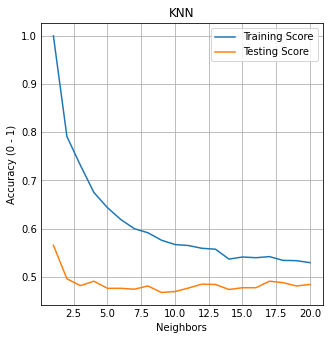

Test set predictions: [7 5 6 ... 6 6 5]
Test set accuracy: 0.48
0.5420771756978654
0.4910769230769231


In [171]:
from sklearn.neighbors import KNeighborsClassifier

#
# clf = KNeighborsClassifier(n_neighbors=1)
# clf.fit(X_train, y_train)

plt.style.use('_mpl-gallery')
x = np.linspace(1, 20, 20)
results = []
for neighbor_count in x:
    clf = KNeighborsClassifier(n_neighbors=int(neighbor_count))
    clf.fit(X_train, y_train)
    results.append(
        [
            neighbor_count,
            clf.score(X_train, y_train),
            clf.score(X_test, y_test)
        ]
    )
    # print(neighbor_count, " | Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))
#
fig, ax = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(4)
x = [neighbors[0] for neighbors in results]
plt.title("KNN")
plt.xlabel("Neighbors")
plt.ylabel("Accuracy (0 - 1)")
plt.plot(x, [train[1] for train in results], label='Training Score')
plt.plot(x, [test[2] for test in results], label='Testing Score')
plt.legend()
# fig = plt.figure()
plt.show()
#

print("Test set predictions: {}".format(clf.predict(X_test)))
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))
clf = KNeighborsClassifier(n_neighbors=int(17))
clf.fit(X_train, y_train)

print( clf.score(X_train, y_train))
print( clf.score(X_test, y_test))

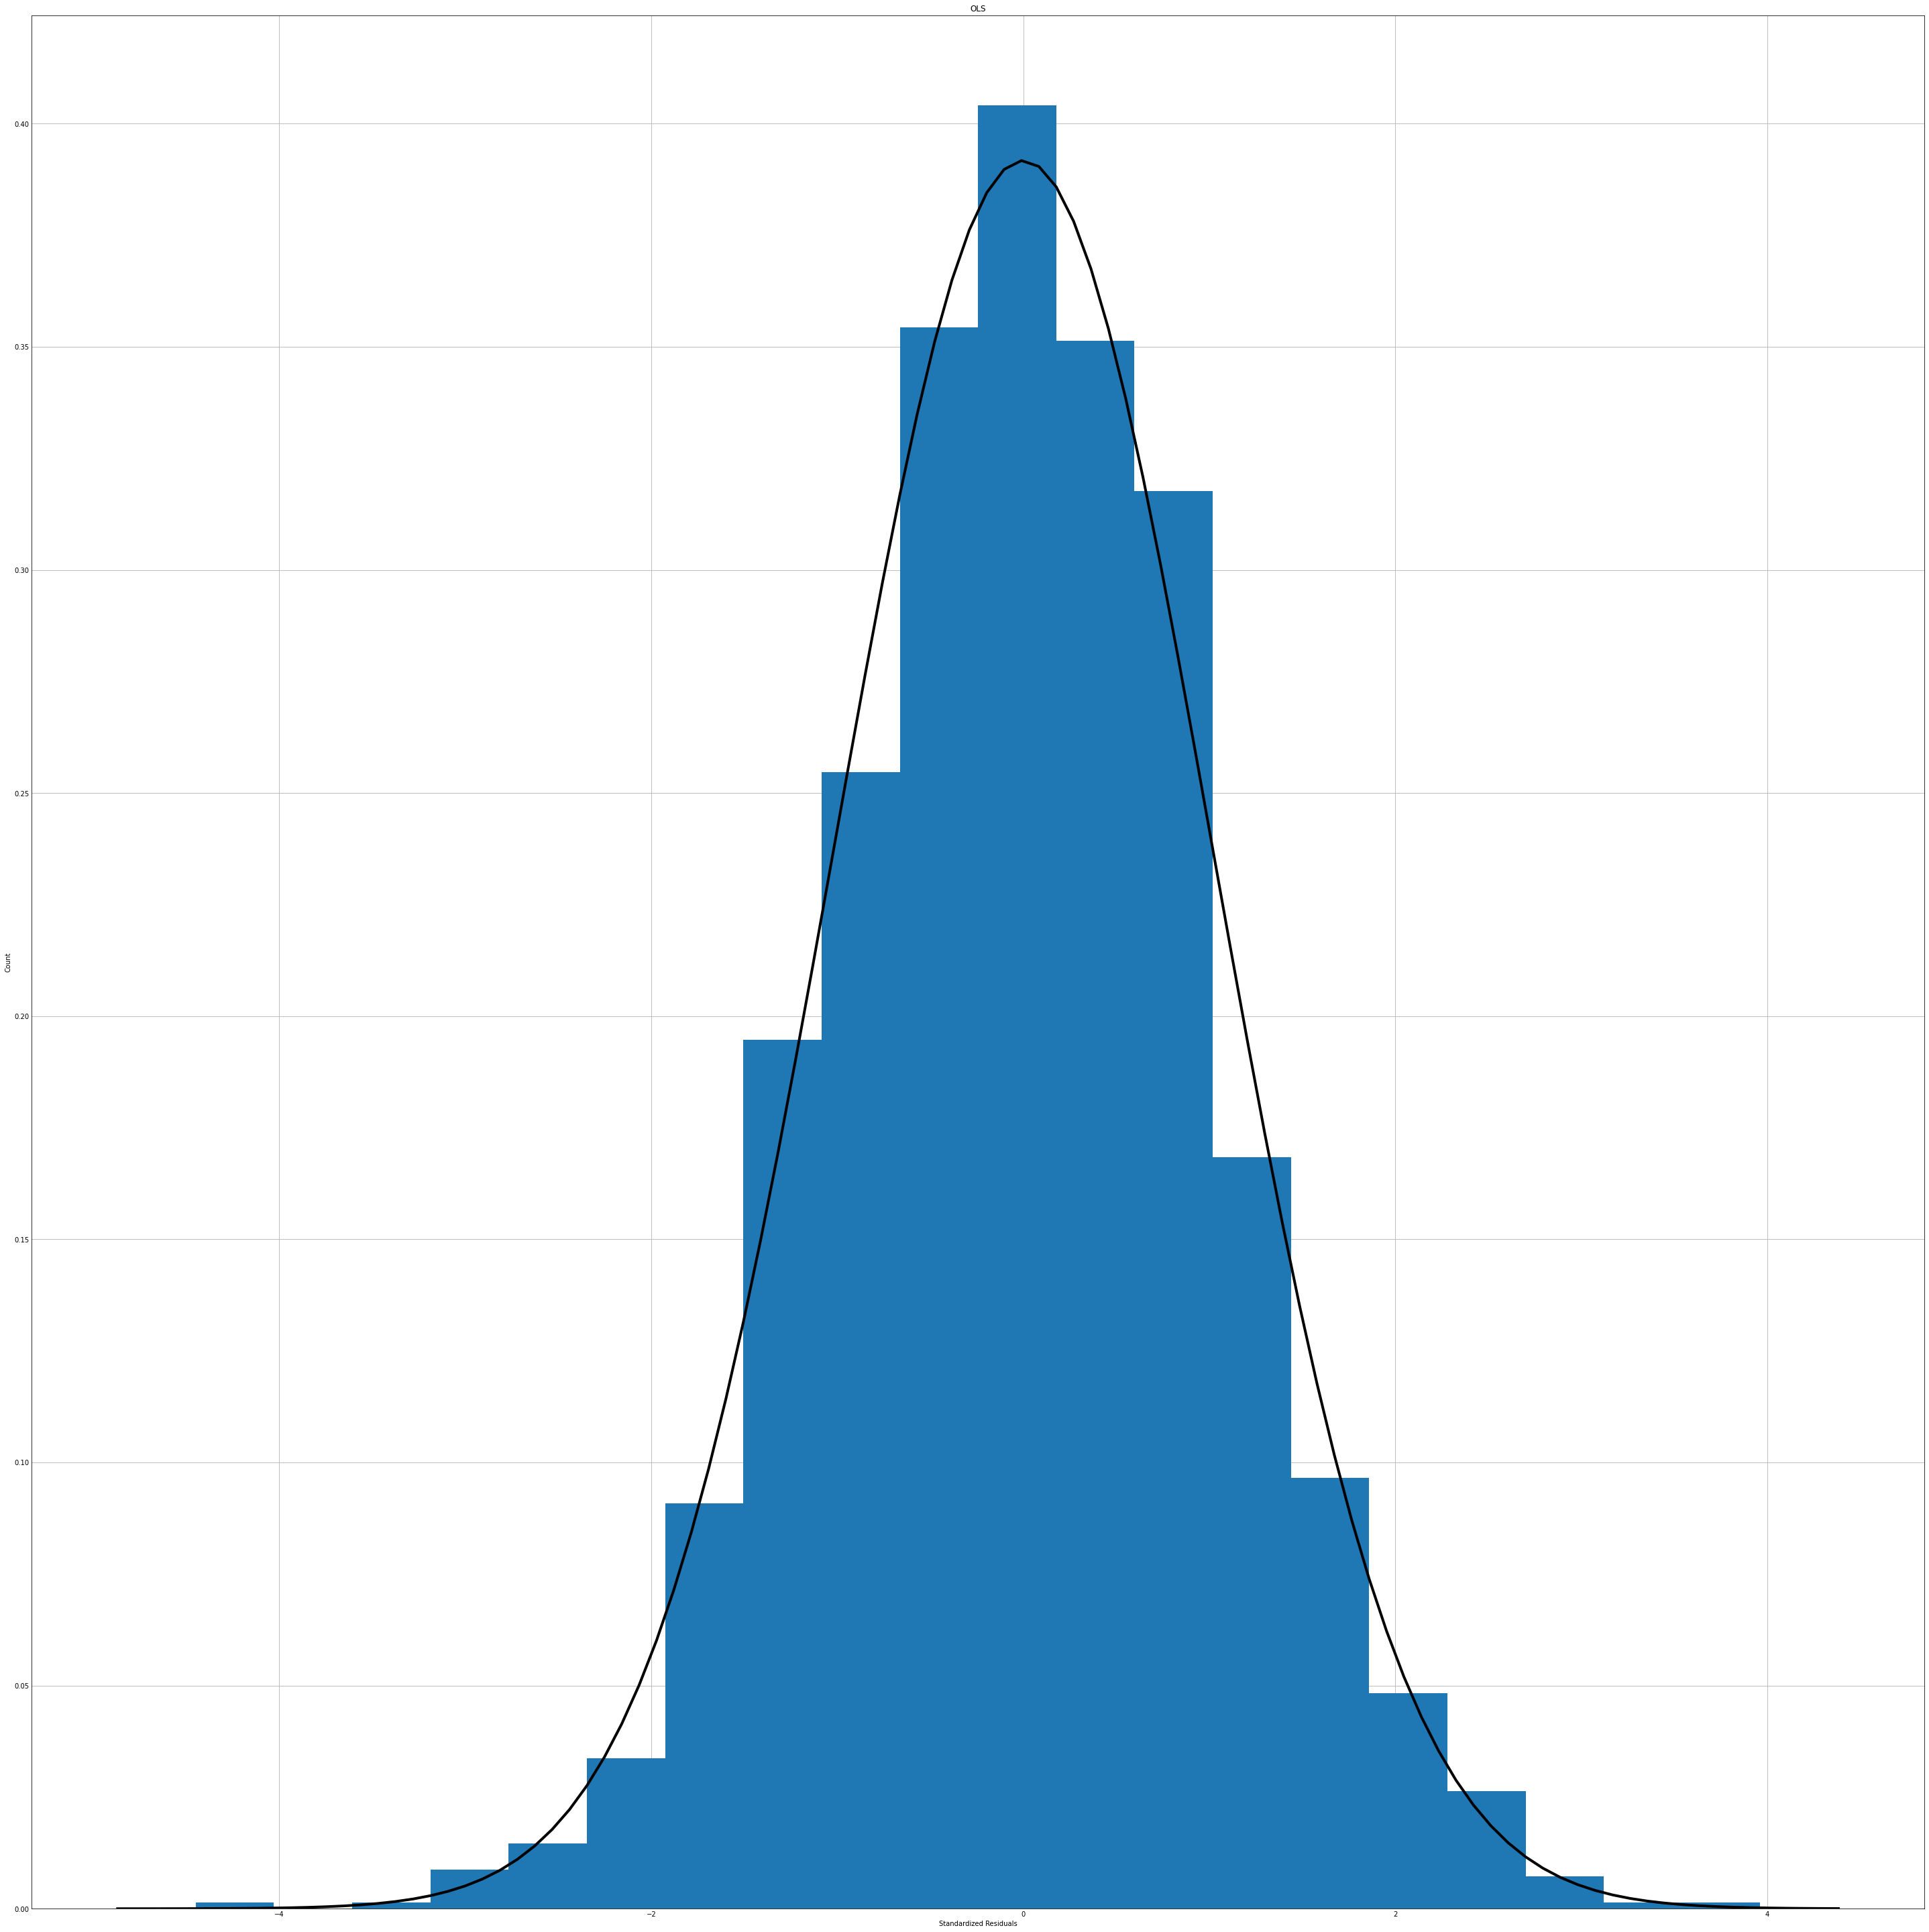

0.2760977537347614
0.3367357487934892


In [172]:
from scipy.stats import norm
from matplotlib import mlab
from statistics import mean, stdev
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)
# print("lr.coef_: {}".format(lr.coef_))
# print("lr.intercept_: {}".format(lr.intercept_))
# print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
# print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))
residuals = np.diff(y_test - lr.predict(X_test))

# mu = mean(residuals)
# sigma = stdev(residuals)
fig = plt.figure()
fig.set_figheight(40)
fig.set_figwidth(40)
mu, std = norm.fit(residuals)

plt.hist(residuals, bins=20, density=True)
# best_fit = norm.pdf(bins, mu, std)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=4)

plt.title("OLS")
plt.xlabel("Standardized Residuals")
plt.ylabel("Count")
plt.show()

print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

## Ridge Regression

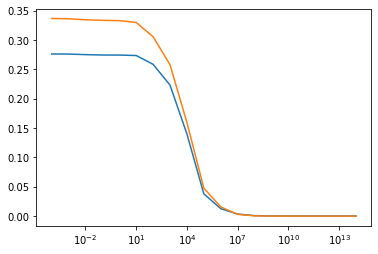

[[0.0001, 0.2760956783194932, 0.33666992664194795], [0.001, 0.27597527123765087, 0.3361451020106726], [0.01, 0.274985076718685, 0.33435972074609166], [0.1, 0.27435291177349674, 0.33343732507195], [1.0, 0.2742472943511054, 0.3329106234571949], [10.0, 0.27349685603907326, 0.3298095317733397], [100.00000000000001, 0.2584141732787487, 0.3054476680628907], [1000.0000000000001, 0.2230230864376932, 0.2576642375830164], [10000.0, 0.13963626220022674, 0.15914740259394744], [100000.00000000001, 0.03770932297076779, 0.04733644993411701], [1000000.0000000001, 0.012506949455049154, 0.015495829215351309], [10000000.0, 0.0032610336757036285, 0.0027818725139575617], [100000000.00000001, 0.0006287554551621666, 0.00026262708785329547], [1000000000.0000001, 7.252699896564963e-05, -0.00016234953431659704], [10000000000.0, 7.370006520512895e-06, -0.00021109807726893415], [100000000000.00002, 7.381988001986528e-07, -0.00021605060699902978], [1000000000000.0001, 7.383188715959221e-08, -0.00021654665523840322

In [29]:
from sklearn.linear_model import Ridge

# go from .00001 to 10000 and then zoom into a good region
results = []
for x in range(1, 20, 1):
    y = .00001 * (math.pow(10, x))
    ridge = Ridge(alpha=y).fit(X_train, y_train)
    score_train = ridge.score(X_train, y_train)
    score_test = ridge.score(X_test, y_test)
    results.append([y, score_train, score_test])

    # print("ridge: ", y)
    # print("Training set score: {:.2f}".format(score_train))
    # print("Test set score: {:.2f}".format(score_test))

x = np.linspace(.00001, 100000000000000)
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.plot([alpha[0] for alpha in results], [train[1] for train in results])
ax.plot([alpha[0] for alpha in results], [test[2] for test in results])
plt.show()
print(results)


# ridge1 = Ridge(alpha=1).fit(X_train, y_train)
# print("Training set score: {:.2f}".format(ridge1.score(X_train, y_train)))
# print("Test set score: {:.2f}".format(ridge1.score(X_test, y_test)))
#
# ridge10 = Ridge(alpha=100).fit(X_train, y_train)
# print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
# print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))
#
# ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
# print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
# print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

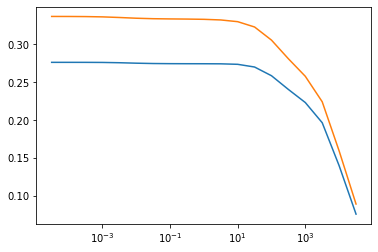

[[3.1622776601683795e-05, 0.27609753634099843, 0.3367148079696448], [0.0001, 0.2760956783194932, 0.33666992664194795], [0.00031622776601683794, 0.2760797102505581, 0.336532159379608], [0.001, 0.27597527123765087, 0.3361451020106726], [0.00316227766016838, 0.275592425965563, 0.33533109728972343], [0.01, 0.274985076718685, 0.33435972074609166], [0.0316227766016838, 0.2745467170376047, 0.33373153327012606], [0.1, 0.27435291177349674, 0.33343732507195], [0.31622776601683794, 0.27428260763660195, 0.33324264448447205], [1.0, 0.2742472943511054, 0.3329106234571949], [3.1622776601683795, 0.274145064511478, 0.3320827878576208], [10.0, 0.27349685603907326, 0.3298095317733397], [31.6227766016838, 0.2699232559371819, 0.3227862920203911], [100.00000000000001, 0.2584141732787487, 0.3054476680628907], [316.22776601683796, 0.24029410084127378, 0.2808204618520389], [1000.0000000000001, 0.2230230864376932, 0.2576642375830164], [3162.27766016838, 0.19635665722588946, 0.2240286081196955], [10000.0, 0.1396

In [30]:
results = []
for x in range(1, 20, 1):
    y = .00001 * (math.pow(10, x * 0.5))
    ridge = Ridge(alpha=y).fit(X_train, y_train)
    score_train = ridge.score(X_train, y_train)
    score_test = ridge.score(X_test, y_test)
    results.append([y, score_train, score_test])

    # print("ridge: ", y)
    # print("Training set score: {:.2f}".format(score_train))
    # print("Test set score: {:.2f}".format(score_test))

fig, ax = plt.subplots()
ax.set_xscale('log')
ax.plot([alpha[0] for alpha in results], [train[1] for train in results])
ax.plot([alpha[0] for alpha in results], [test[2] for test in results])
plt.show()
print(results)

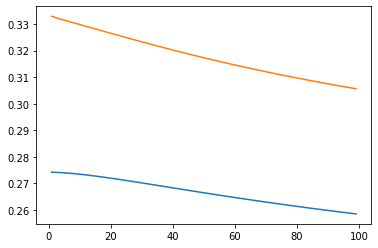

[[1, 0.2742472943511054, 0.3329106234571949], [2, 0.2742068767706437, 0.3325074860500169], [3, 0.2741546933204988, 0.33214033412911637], [4, 0.27409042149235974, 0.33179175551191675], [5, 0.27401490500444114, 0.3314534913625379], [6, 0.27392900071859805, 0.3311209928746449], [7, 0.2738335136063317, 0.33079161912352184], [8, 0.27372919759349534, 0.33046380388012275], [9, 0.2736167585272856, 0.33013661952646545], [10, 0.27349685603907326, 0.3298095317733397], [11, 0.2733701051463109, 0.3294822545497582], [12, 0.27323707804421615, 0.3291546608004623], [13, 0.2730983061661796, 0.32882672598123963], [14, 0.27295428244765296, 0.3284984914103162], [15, 0.2728054636975936, 0.32817004005738926], [16, 0.27265227299239214, 0.32784148032809035], [17, 0.27249510202853566, 0.32751293510143187], [18, 0.27233431339071235, 0.32718453428213046], [19, 0.27217024270843015, 0.3268564097408908], [20, 0.2720032006863071, 0.3265286918973652], [21, 0.27183347500166677, 0.3262015074443272], [22, 0.2716613320688

In [31]:
results = []
for x in range(1, 100, 1):
    y = x
    ridge = Ridge(alpha=y).fit(X_train, y_train)
    score_train = ridge.score(X_train, y_train)
    score_test = ridge.score(X_test, y_test)
    results.append([y, score_train, score_test])

    # print("ridge: ", y)
    # print("Training set score: {:.2f}".format(score_train))
    # print("Test set score: {:.2f}".format(score_test))

fig, ax = plt.subplots()
ax.plot([alpha[0] for alpha in results], [train[1] for train in results])
ax.plot([alpha[0] for alpha in results], [test[2] for test in results])
plt.show()
print(results)

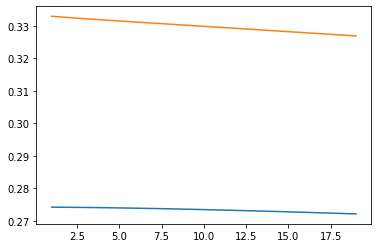

[[1, 0.2742472943511054, 0.3329106234571949], [2, 0.2742068767706437, 0.3325074860500169], [3, 0.2741546933204988, 0.33214033412911637], [4, 0.27409042149235974, 0.33179175551191675], [5, 0.27401490500444114, 0.3314534913625379], [6, 0.27392900071859805, 0.3311209928746449], [7, 0.2738335136063317, 0.33079161912352184], [8, 0.27372919759349534, 0.33046380388012275], [9, 0.2736167585272856, 0.33013661952646545], [10, 0.27349685603907326, 0.3298095317733397], [11, 0.2733701051463109, 0.3294822545497582], [12, 0.27323707804421615, 0.3291546608004623], [13, 0.2730983061661796, 0.32882672598123963], [14, 0.27295428244765296, 0.3284984914103162], [15, 0.2728054636975936, 0.32817004005738926], [16, 0.27265227299239214, 0.32784148032809035], [17, 0.27249510202853566, 0.32751293510143187], [18, 0.27233431339071235, 0.32718453428213046], [19, 0.27217024270843015, 0.3268564097408908]]


In [32]:
results = []
for x in range(1, 20, 1):
    y = x
    ridge = Ridge(alpha=y).fit(X_train, y_train)
    score_train = ridge.score(X_train, y_train)
    score_test = ridge.score(X_test, y_test)
    results.append([y, score_train, score_test])

    # print("ridge: ", y)
    # print("Training set score: {:.2f}".format(score_train))
    # print("Test set score: {:.2f}".format(score_test))

fig, ax = plt.subplots()
ax.plot([alpha[0] for alpha in results], [train[1] for train in results])
ax.plot([alpha[0] for alpha in results], [test[2] for test in results])
plt.show()
print(results)

0.27401490500444114
0.3314534913625379


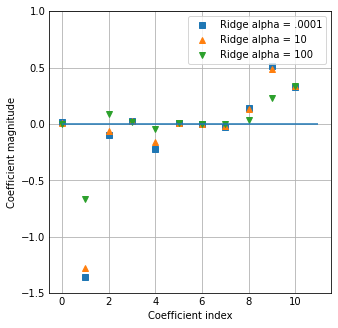

In [170]:

ridge1 = Ridge(alpha=5).fit(X_train, y_train)
ridge5 = Ridge(alpha=10).fit(X_train, y_train)
ridge10 = Ridge(alpha=100).fit(X_train, y_train)
fig = plt.figure()
fig.set_figwidth(4)
fig.set_figheight(4)

plt.plot(ridge1.coef_, 's', label="Ridge alpha = .0001")
plt.plot(ridge5.coef_, '^', label="Ridge alpha = 10")
plt.plot(ridge10.coef_, 'v', label="Ridge alpha = 100")

plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-1.5, 1)
plt.legend()

print(ridge1.score(X_train, y_train))
print(ridge1.score(X_test, y_test))

## LASSO

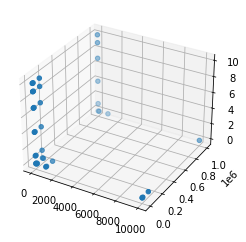

In [34]:
from sklearn.linear_model import Lasso

results = []
for x in range(1, 10, 1):
    alpha = .00001 * (math.pow(10, x))
    for y in range(1, 6, 1):
        iteration_count = 10 * (math.pow(10, y))
        lasso = Lasso(alpha=alpha, max_iter=iteration_count).fit(X_train, y_train)
        features = np.sum(lasso.coef_ != 0)
        results.append(
            [
                alpha,
                iteration_count,
                features
            ]
        )

ax = plt.axes(projection='3d')
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.scatter3D(
    [alpha[0] for alpha in results],
    [iterations[1] for iterations in results],
    [features[2] for features in results]
)

/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.262e+03, tolerance: 3.682e-01
  model = cd_fast.enet_coordinate_descent(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.586e+02, tolerance: 3.682e-01
  model = cd_fast.enet_coordinate_descent(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the numbe

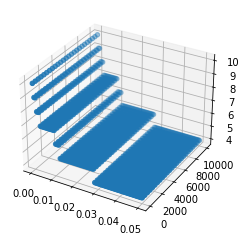

In [61]:
from sklearn.linear_model import Lasso

results = []
alphas = np.linspace(0.0001, 0.05, 100)
for alpha in alphas:
    iteration_counts = np.linspace(10, 10000, 25)
    for iteration_count in iteration_counts:
        lasso = Lasso(alpha=alpha, max_iter=iteration_count).fit(X_train, y_train)
        features = np.sum(lasso.coef_ != 0)
        results.append(
            [
                alpha,
                iteration_count,
                features
            ]
        )

ax = plt.axes(projection='3d')
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.scatter3D(
    [alpha[0] for alpha in results],
    [iterations[1] for iterations in results],
    [features[2] for features in results]
)

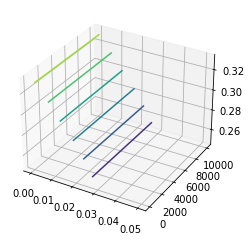

In [111]:
from sklearn.linear_model import Lasso

results = []
alphas = np.linspace(0.0001, 0.05, 100)
iterations = np.linspace(100, 10000, 20)
X, Y = np.meshgrid(alphas, iterations)


def f(x, y):
    lasso = Lasso(alpha=x, max_iter=y).fit(X_train, y_train)
    return lasso.score(X_test, y_test)


z_func_np = np.frompyfunc(z_func_np, 2, 1)
#
# for alpha in alphas:
#     for interation_count in iterations:
#         lasso = Lasso(alpha=alpha, max_iter=iteration_count).fit(X_train, y_train)
#         features = np.sum(lasso.coef_ != 0)
#         results.append(
#             [
#                 alpha,
#                 iteration_count,
#                 lasso.score(X_test, y_test)
#             ]
#         )
#
# print(len(results))
#
# def f(x, y):
#     lasso = Lasso(alpha=x.any(), max_iter=y.any()).fit(X_train, y_train)
#     return lasso.score(X_test, y_test)


# x = [alpha[0] for alpha in results]
# y = [iteration_count[1] for iteration_count in results]
# z = [score[2] for score in results]
# X, Y = np.meshgrid(x, y)
Z = z_func_np(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, cmap='viridis')
# ax.set_xscale('log')
# ax.set_yscale('log')
# ax.plot_wireframe(X, Y, Z)
# ax.plot_surface(X, Y, Z, 50, cmap='binary')

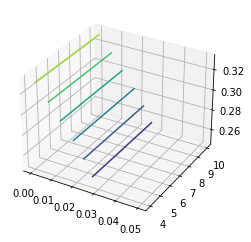

In [113]:
from sklearn.linear_model import Lasso

results = []
alphas = np.linspace(0.0001, 0.05, 100)
features = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=1000).fit(X_train, y_train)
    features.append(np.sum(lasso.coef_ != 0))

X, Y = np.meshgrid(alphas, features)


def z_func(x, y):
    lasso = Lasso(alpha=x, max_iter=1000).fit(X_train, y_train)
    return lasso.score(X_test, y_test)


z_func_np = np.frompyfunc(z_func, 2, 1)
Z = z_func_np(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, cmap='viridis')

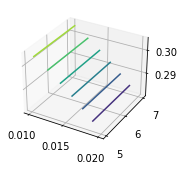

In [163]:
from sklearn.linear_model import Lasso

results = []
alphas = np.linspace(0.01, 0.02, 100)
features = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=1000).fit(X_train, y_train)
    features.append(np.sum(lasso.coef_ != 0))

X, Y = np.meshgrid(alphas, features)


def z_func(x, y):
    lasso = Lasso(alpha=x, max_iter=1000).fit(X_train, y_train)
    return lasso.score(X_test, y_test)


z_func_np = np.frompyfunc(z_func, 2, 1)
Z = z_func_np(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, cmap='viridis')

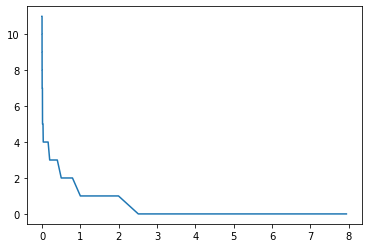

In [51]:
from sklearn.linear_model import Lasso

results = []
for x in range(1, 70, 1):
    alpha = .000001 * (math.pow(10, x * .1))
    # for y in range(1, 10000, 100):
    iteration_count = 10000
    lasso = Lasso(alpha=alpha, max_iter=iteration_count).fit(X_train, y_train)
    features = np.sum(lasso.coef_ != 0)
    results.append(
        [
            alpha,
            iteration_count,
            features
        ]
    )

plt.plot(
    [alpha[0] for alpha in results],
    [features[2] for features in results]
)
plt.show()

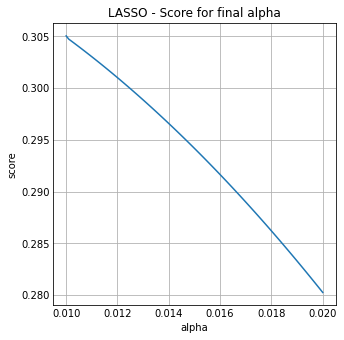

0.25853403854598467
0.3050479089859486
7


In [168]:
from sklearn.linear_model import Lasso

results = []
alphas = np.linspace(0.01, 0.02, 100)
for alpha in alphas:
    # alpha = .000001 * (math.pow(10, x*.1))
    # for y in range(1, 10000, 100):
    iteration_count = 10000
    lasso = Lasso(alpha=alpha, max_iter=iteration_count).fit(X_train, y_train)
    features = np.sum(lasso.coef_ != 0)
    results.append(
        [
            alpha,
            lasso.score(X_test, y_test),
            features
        ]
    )

fig = plt.figure()
fig.set_figheight(4)
fig.set_figwidth(4)

plt.title("LASSO - Score for final alpha")
plt.xlabel("alpha")
plt.ylabel("score")
plt.plot(
    [alpha[0] for alpha in results],
    [features[1] for features in results]
)

plt.show()

lasso = Lasso(alpha=0.01, max_iter=1000).fit(X_train, y_train)
print(    lasso.score(X_train, y_train))
print(    lasso.score(X_test, y_test))
print(        np.sum(lasso.coef_ != 0)
)

In [ ]:

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

In [ ]:
lasso = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

In [ ]:
lasso = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))